# Packages

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from scipy.interpolate import interp2d, NearestNDInterpolator,RegularGridInterpolator

%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial' # Choose a nice font here
plt.rcParams['font.size'] = 7 # standard font size
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['figure.facecolor'] = 'white' # make sure background isn't transparent
plt.rcParams['figure.dpi'] = 300

# Functions and constants

In [5]:
def xyz_geotiff(img):
    band = img.GetRasterBand(2)
    print(band)
    z = np.flipud(band.ReadAsArray()).T
    width = img.RasterXSize
    height = img.RasterYSize
    gt = img.GetGeoTransform()
    print(gt)
    minx = gt[0]
    miny = gt[3] + width*gt[4] + height*gt[5]
    maxx = gt[0] + width*gt[1] + height*gt[2]
    maxy = gt[3]
    lon = np.linspace(minx,maxx,width)
    lat = np.linspace(miny,maxy,height)
    return lon,lat,z

def get_transect(lat1,lat2,lon1,lon2,npoints,x,y,z):
    transect_length  = np.sqrt((lon2-lon1)**2 + (lat2-lat1)**2)
    angle = np.arctan((lon2-lon1)/(lat2-lat1))
    transect_pointss = np.linspace(-transect_length/2,transect_length/2,npoints)
    transect_pointsx = transect_pointss*np.cos(angle)+lat1
    transect_pointsy = transect_pointss*np.sin(angle)+lon1
    finterp2d = interp2d(x,y,z)
    transect_pointsz = np.diag(np.fliplr(finterp2d(transect_pointsx,transect_pointsy)))
    return transect_pointsx,transect_pointsy,transect_pointss,transect_pointsz



# Read data

In [8]:
#test open the DEM file
import os


file_path = '20220921_P5020_1_DEM.tif'
print(os.path.exists(file_path))  

if os.path.exists(file_path):
    test_file = gdal.Open(file_path)
    if test_file is None:
        print("GDAL could not open the test file.")
    else:
        print("GDAL successfully opened the test file.")
else:
    print("File does not exist in the specified path.")

True
GDAL successfully opened the test file.


In [10]:
#Open the Tiff file
data_geotiff_DEM = gdal.Open('20220921_P5020_1_DEM.tif')
data_geotiff_RTP = gdal.Open('20220921_P5020_1_RTP.tif')
lon_geotiff_1,lat_geotiff_1,z_geotiff_1= xyz_geotiff(data_geotiff_DEM)
lon_geotiff_2,lat_geotiff_2,z_geotiff_2= xyz_geotiff(data_geotiff_RTP)
print(data_geotiff_DEM.GetMetadata())
print(data_geotiff_RTP.GetMetadata())

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000001D6F6F3BF00> >
(496619.6551724138, 40.0, 0.0, 5365059.655172414, 0.0, -40.0)
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000001D6F5B63480> >
(496578.275862069, 44.57165038493889, 0.0, 5365095.633175909, 0.0, -44.57165038493889)
{'AREA_OR_POINT': 'Area'}
{'AREA_OR_POINT': 'Area'}


# Plots

C:\Users\Aluric\AppData\Local\Temp/ipykernel_27852/3396998995.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon_geotiff_1,lat_geotiff_1,z_geotiff_1.transpose(),cmap='binary_r')
C:\Users\Aluric\AppData\Local\Temp/ipykernel_27852/1058432413.py:23: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://sci

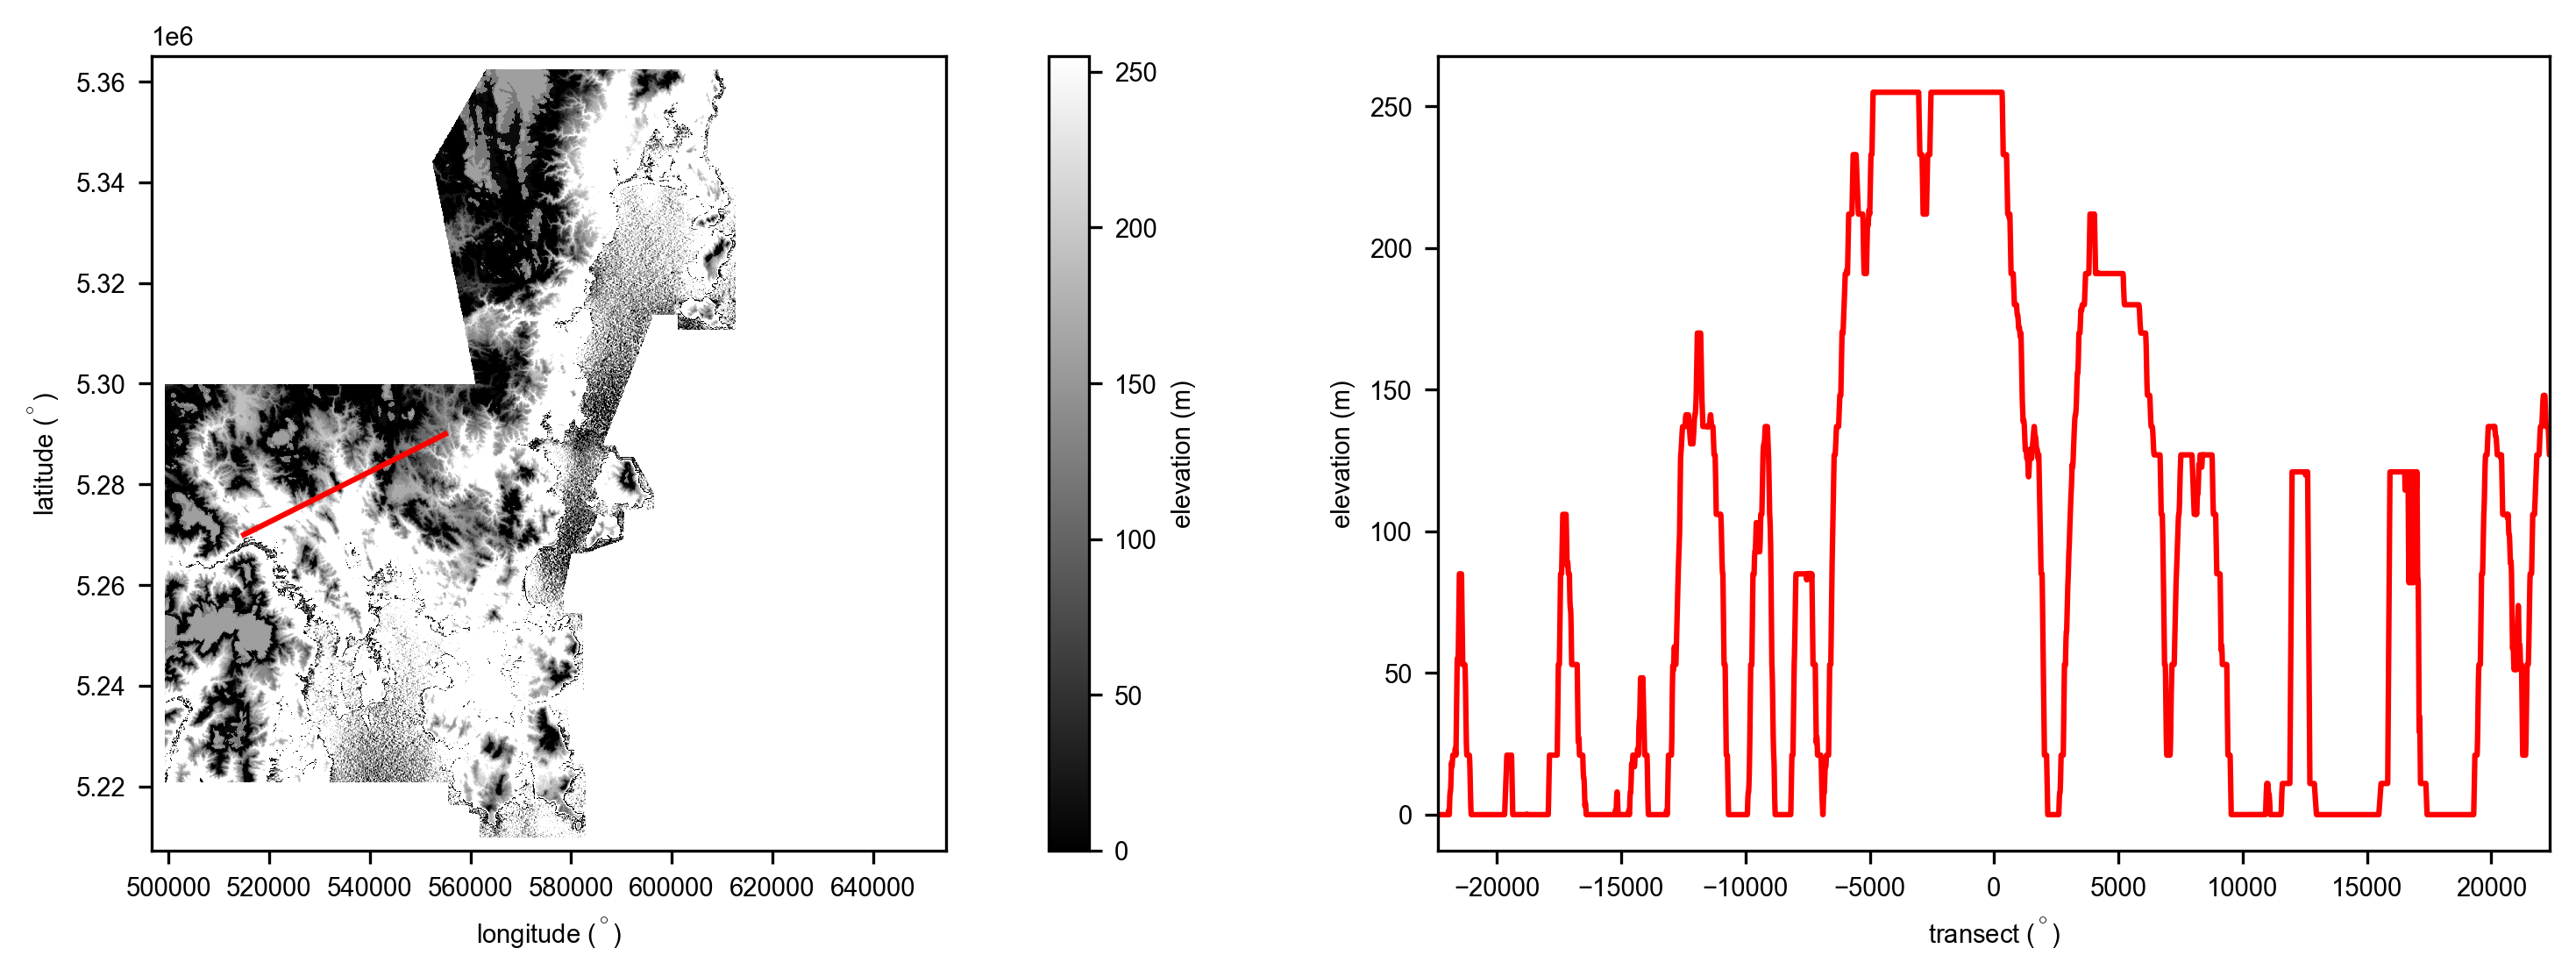

In [11]:
#Set the Cross section here
lat1 = 535000
lat2 = 575000
lon1 = 5280000
lon2 = 5300000
npoints = 10000

colors = ['b','m','y','k']

fig = plt.gcf()

ax1 = plt.subplot(121)

plt.pcolormesh(lon_geotiff_1,lat_geotiff_1,z_geotiff_1.transpose(),cmap='binary_r')
plt.colorbar(label='elevation (m)')
plt.axis('square')

ax2 = plt.subplot(122)


(transect_pointsx_1,
    transect_pointsy_1,
    transect_pointss_1,
    transect_pointsz_1) = get_transect(lat1,lat2,lon1,lon2,
                                                                                       npoints,
                                                                                       lon_geotiff_1,
                                                                                       lat_geotiff_1,
                                                                                       z_geotiff_1.transpose())
    
ax1.plot(transect_pointsx_1,transect_pointsy_1,c='r')
ax2.plot(transect_pointss_1,transect_pointsz_1,c='r')
    
ax1.set_xlabel('longitude ($^\\circ$)')
ax1.set_ylabel('latitude ($^\\circ$)')
ax2.set_xlabel('transect ($^\\circ$)')
ax2.set_ylabel('elevation (m)')
ax2.set_xlim(transect_pointss_1[0],transect_pointss_1[-1])

fig.set_size_inches(12,4)
plt.savefig('DEM.JPG')

C:\Users\Aluric\AppData\Local\Temp/ipykernel_27852/3012625130.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon_geotiff_2,lat_geotiff_2,z_geotiff_2.transpose(),cmap='binary_r')
C:\Users\Aluric\AppData\Local\Temp/ipykernel_27852/1058432413.py:23: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scip

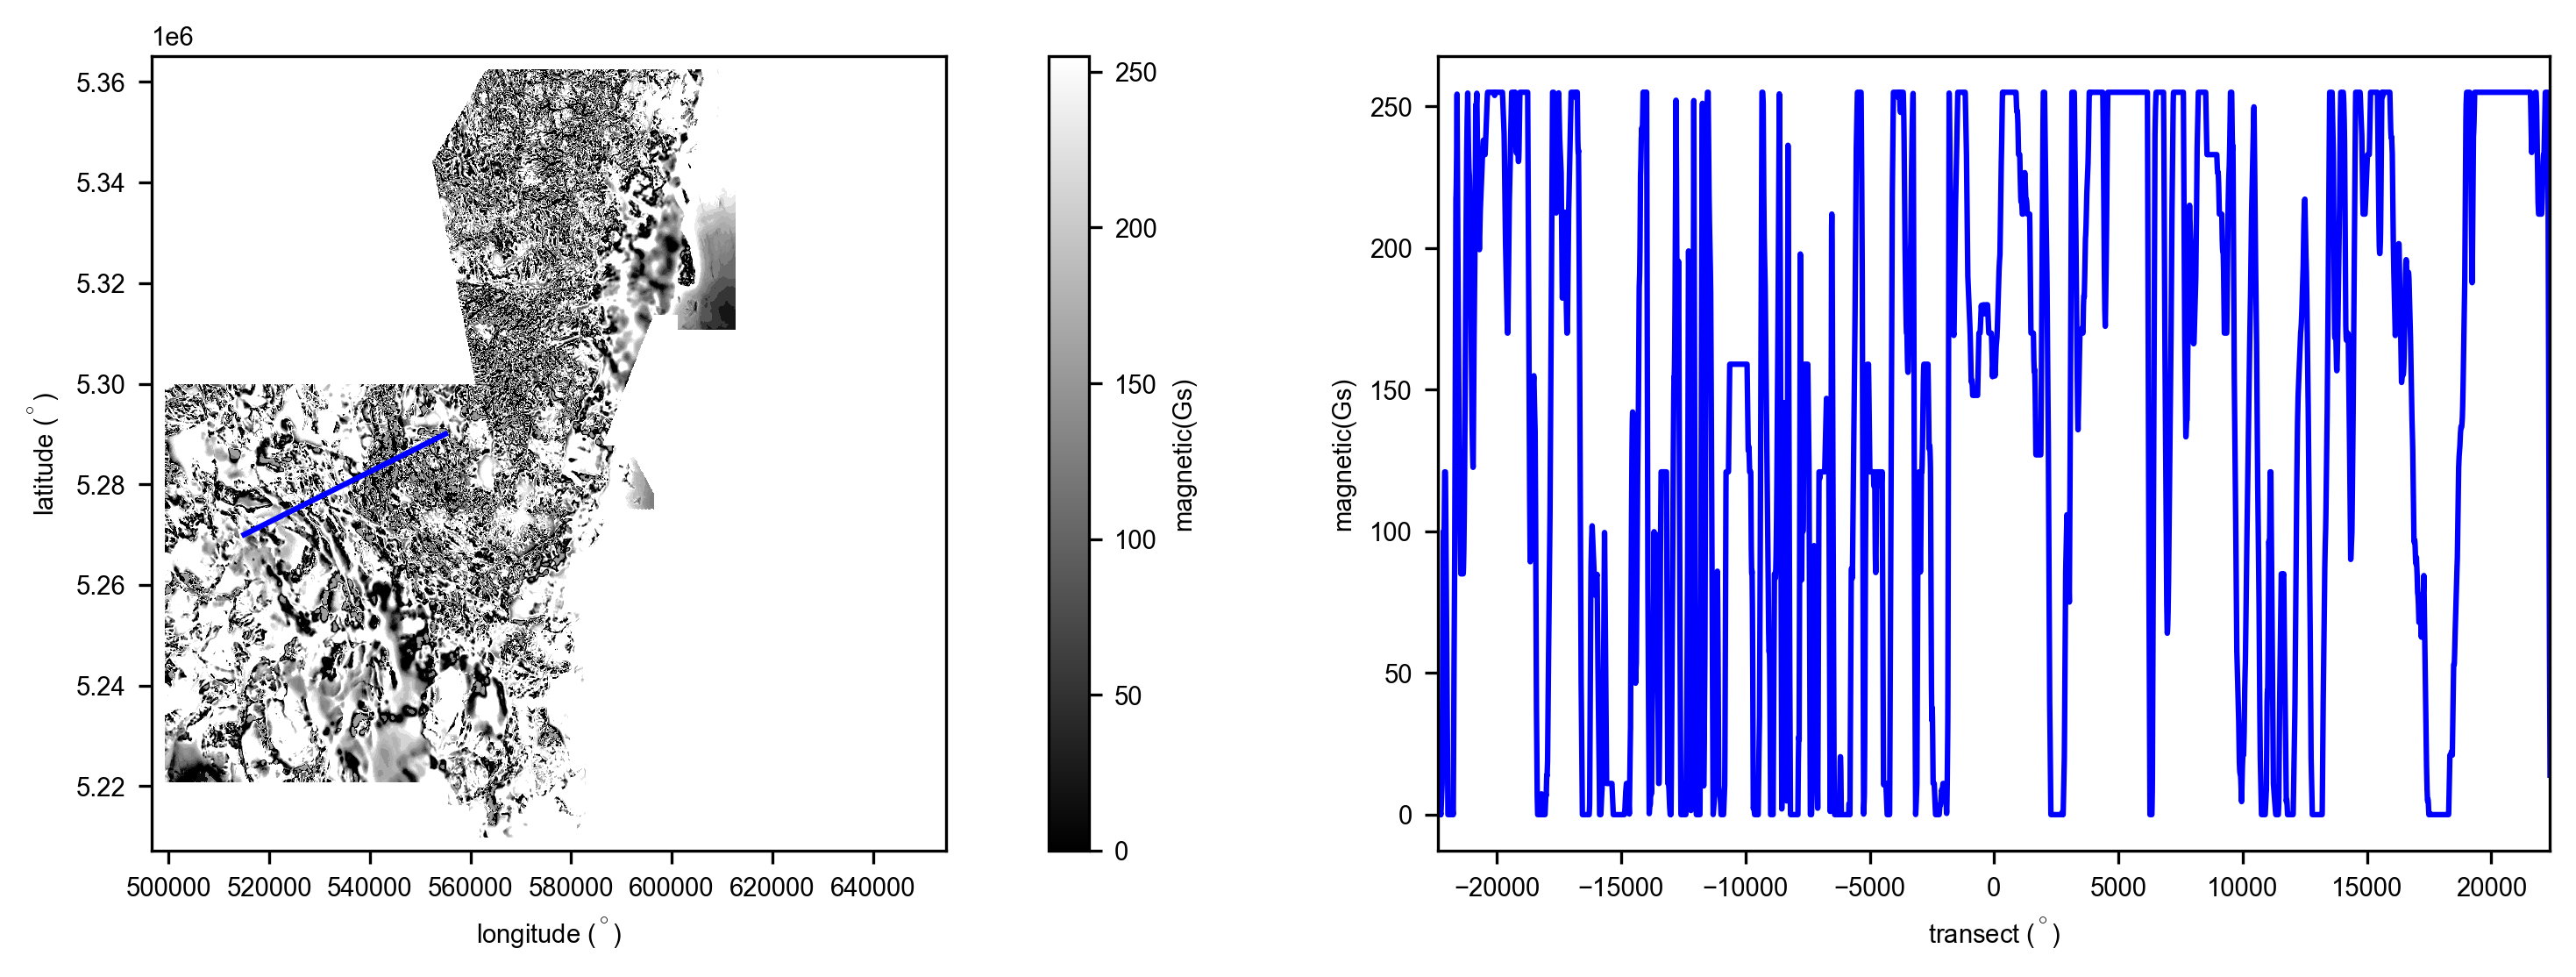

In [12]:
fig = plt.gcf()

ax1 = plt.subplot(121)

plt.pcolormesh(lon_geotiff_2,lat_geotiff_2,z_geotiff_2.transpose(),cmap='binary_r')
plt.colorbar(label='magnetic(Gs)')
plt.axis('square')

ax2 = plt.subplot(122)


(transect_pointsx_2,
    transect_pointsy_2,
    transect_pointss_2,
    transect_pointsz_2) = get_transect(lat1,lat2,lon1,lon2,
                                                                                       npoints,
                                                                                       lon_geotiff_2,
                                                                                       lat_geotiff_2,
                                                                                       z_geotiff_2.transpose())
    
ax1.plot(transect_pointsx_2,transect_pointsy_2,c='b')
ax2.plot(transect_pointss_2,transect_pointsz_2,c='b')
    
ax1.set_xlabel('longitude ($^\\circ$)')
ax1.set_ylabel('latitude ($^\\circ$)')
ax2.set_xlabel('transect ($^\\circ$)')
ax2.set_ylabel('magnetic(Gs)')
ax2.set_xlim(transect_pointss_2[0],transect_pointss_2[-1])

fig.set_size_inches(12,4)
plt.savefig('RTP.JPG')

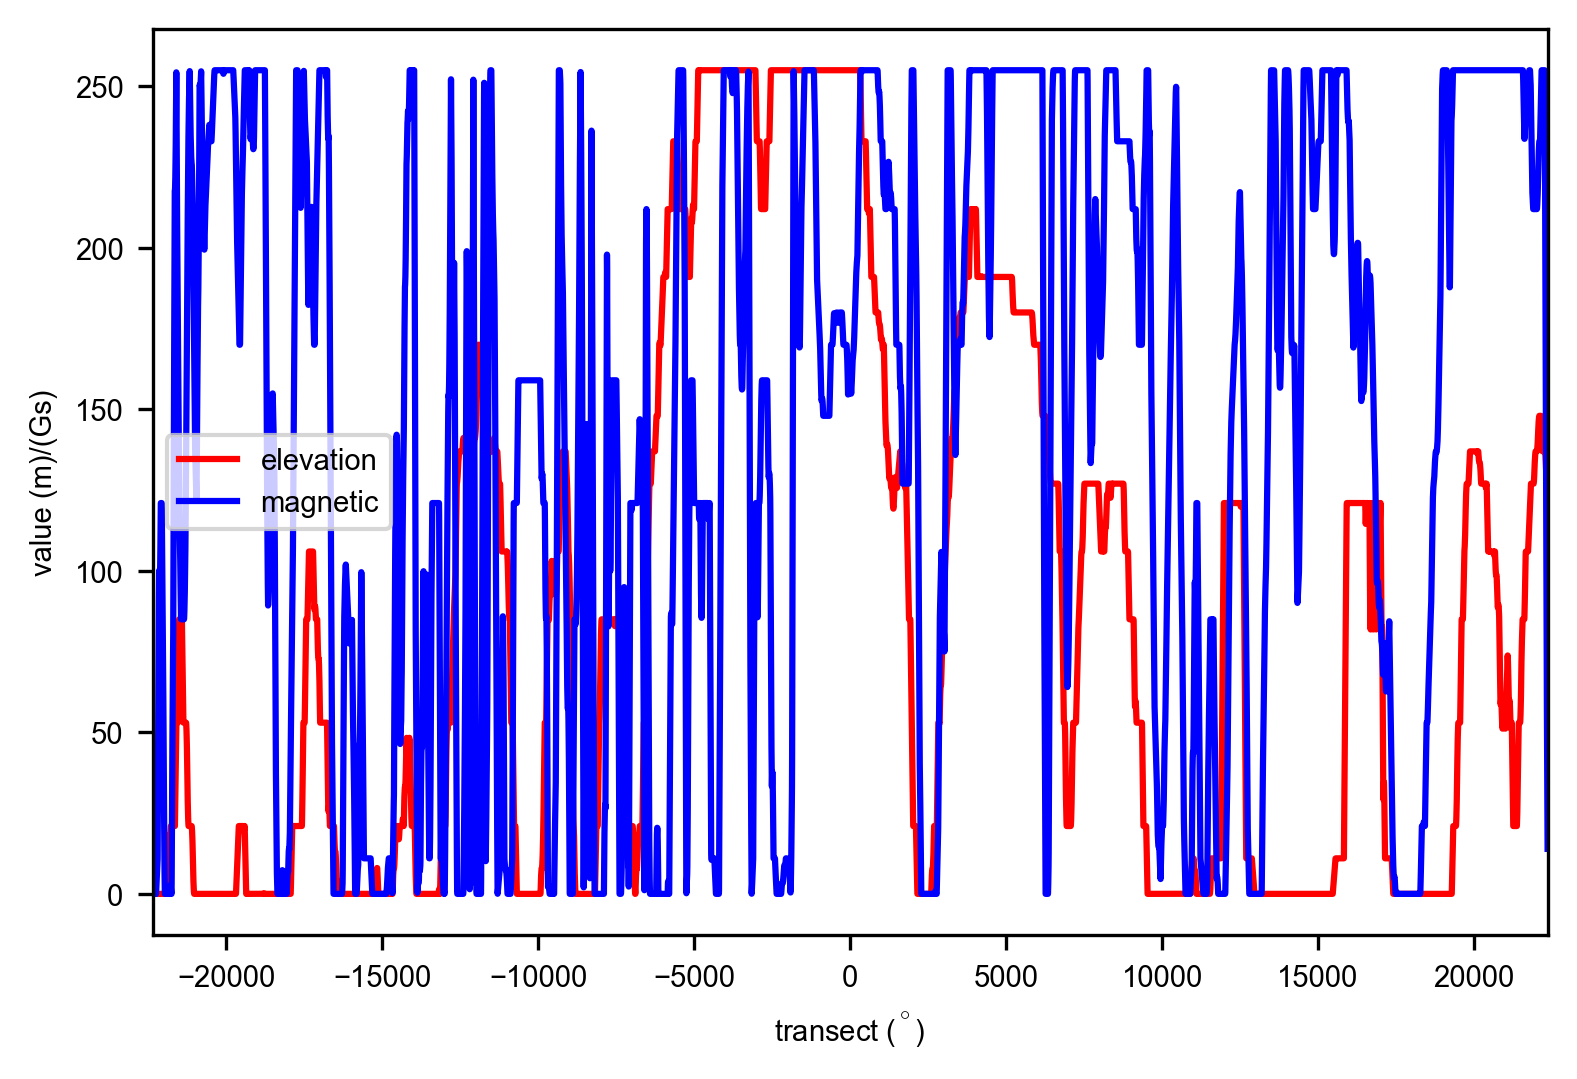

In [13]:
#Plot two line graph together
fig, ax = plt.subplots(1,1)
ax.plot(transect_pointss_1,transect_pointsz_1,c='r',label='elevation')
ax.plot(transect_pointss_2,transect_pointsz_2,c='b',label='magnetic')
ax.set_xlabel('transect ($^\\circ$)')
ax.set_ylabel('value (m)/(Gs)')
ax.set_xlim(transect_pointss_1[0],transect_pointss_1[-1])
ax.legend()
plt.savefig('res.JPG')